<a href="https://colab.research.google.com/github/Swati-Kumari-Das/IntrusionDetection/blob/main/IntrusionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle

# reading features list

In [14]:
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [15]:
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(',\n'):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

# This code is modified by Susobhan Akhuli


42


In [16]:
with open("training_attack_types", 'r') as f:
    print(f.read())


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [17]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [18]:
path = "kddcup.data_10_percent"
df = pd.read_csv(path, names = columns)

# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [19]:
df.shape


(494021, 43)

In [20]:
df['target'].value_counts()

,count
target,
smurf.,280790
neptune.,107201
normal.,97278
back.,2203
satan.,1589
ipsweep.,1247
portsweep.,1040
warezclient.,1020
teardrop.,979


In [21]:
df['Attack Type'].value_counts()

,count
Attack Type,
dos,391458
normal,97278
probe,4107
r2l,1126
u2r,52


In [22]:

df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [23]:
df.isnull().sum()


,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [24]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols


['protocol_type', 'flag', 'service']

In [25]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode categorical features
protocol_type_encoder = LabelEncoder()
df['protocol_type'] = protocol_type_encoder.fit_transform(df['protocol_type'])
joblib.dump(protocol_type_encoder, 'protocol_type_encoder.pkl')

service_encoder = LabelEncoder()
df['service'] = service_encoder.fit_transform(df['service'])
joblib.dump(service_encoder, 'service_encoder.pkl')

flag_encoder = LabelEncoder()
df['flag'] = flag_encoder.fit_transform(df['flag'])
joblib.dump(flag_encoder, 'flag_encoder.pkl')

# Preview processed data
df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [26]:
print(df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


In [27]:
from sklearn.model_selection import train_test_split

# Select features
features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate']
X = df[features]

# Use 'target' as label
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



CATEGORICAL FEATURES **DISTRIBUTION**

In [28]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

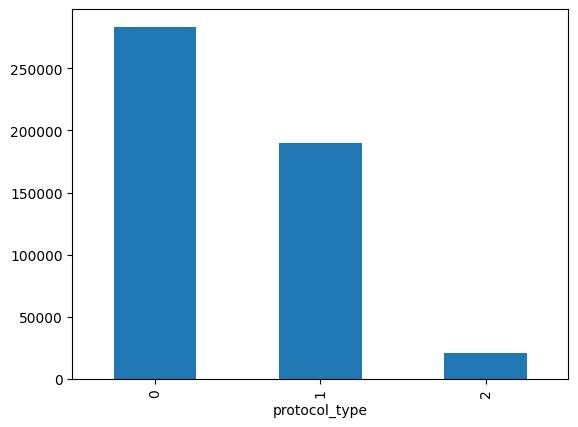

In [29]:
bar_graph('protocol_type')

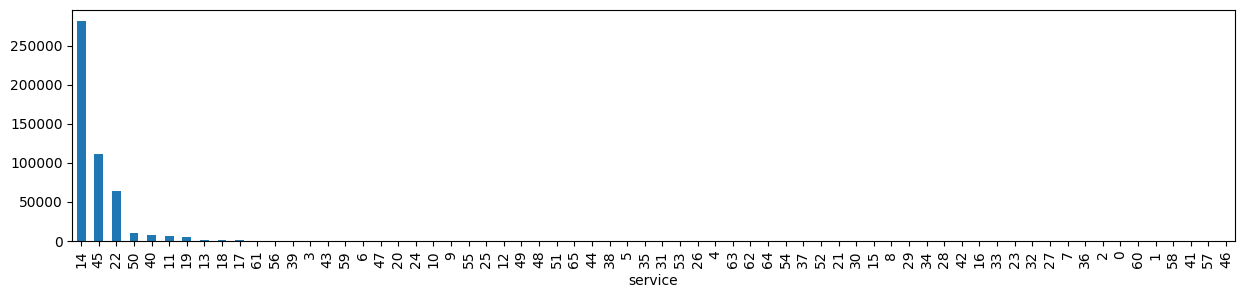

In [30]:

plt.figure(figsize=(15,3))
bar_graph('service')

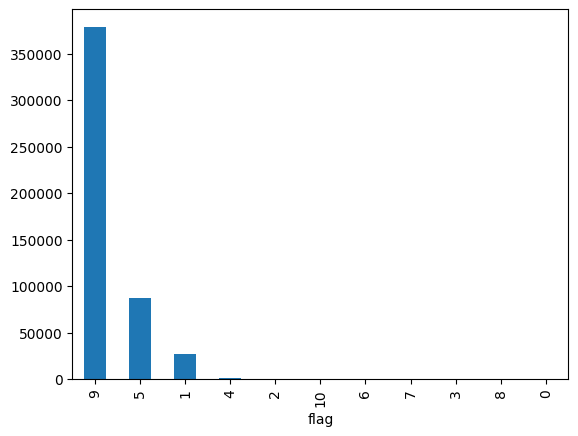

In [31]:
bar_graph('flag')

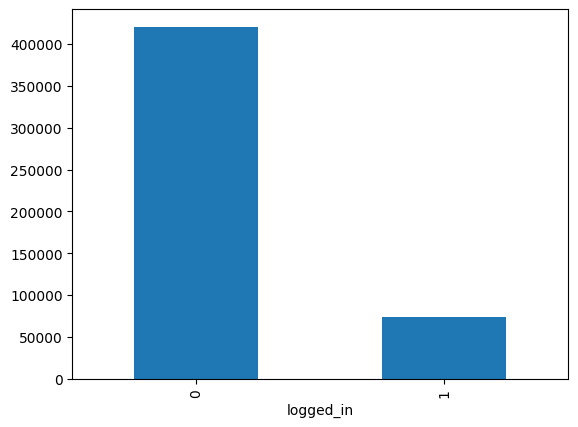

In [32]:
bar_graph('logged_in')

TARGET FEATURE DISTRIBUTION


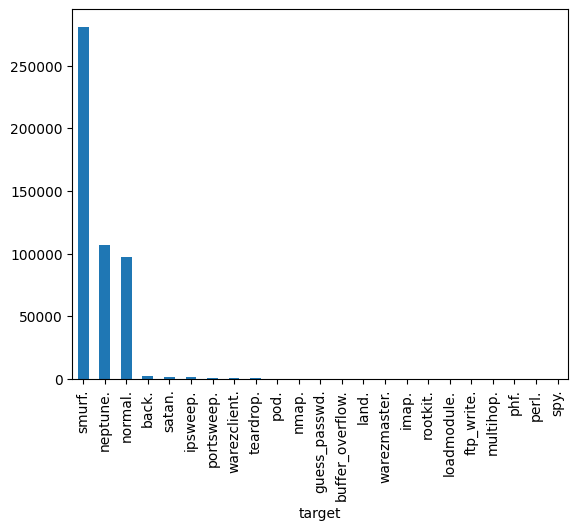

In [33]:
bar_graph('target')

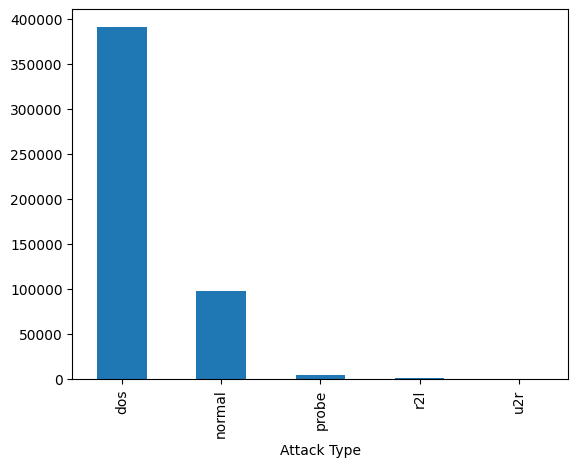

In [34]:

bar_graph('Attack Type')

In [35]:

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')


DATA CORRELATION

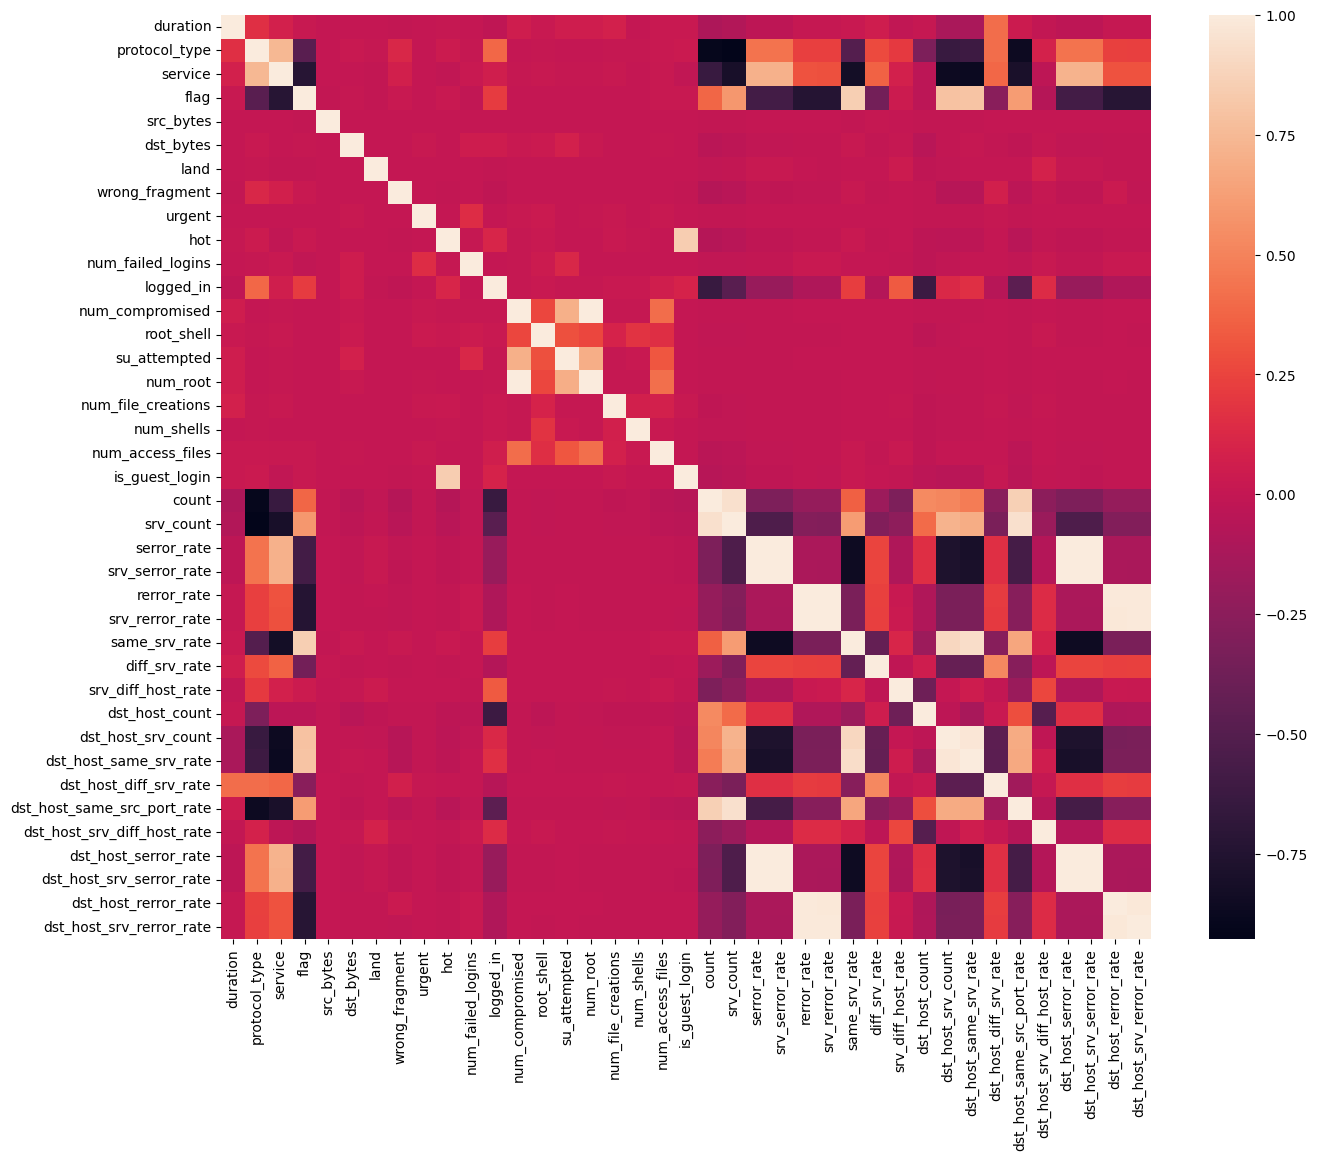

In [36]:
# drop columns with NaN
df = df.dropna(axis='columns')

# keep columns where there are more than 1 unique values and are numeric
ndf = df[[col for col in df.columns if df[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df[col])]]

# Now calculate the correlation matrix
corr = ndf.corr()

plt.figure(figsize =(15, 12))
sns.heatmap(corr)
plt.show()




In [37]:
df['num_root'].corr(df['num_compromised'])



np.float64(0.9938277978737916)

In [38]:
df['srv_serror_rate'].corr(df['serror_rate'])


np.float64(0.998361507272553)

In [39]:
df['srv_count'].corr(df['count'])

np.float64(0.9436670688882645)

In [40]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9947309539818242)

In [41]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

np.float64(0.9736854572953835)

In [42]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

np.float64(0.9981559173373293)

In [43]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

np.float64(0.9848038371110285)

In [44]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

np.float64(0.9278080342690969)

In [45]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

np.float64(0.8989546630323716)

In [46]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

np.float64(0.944926367678324)

In [47]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

np.float64(0.9986729680104371)

In [48]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.9978353003739603)

In [49]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

np.float64(0.997849248567986)

In [50]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.999304109185027)

In [51]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.986994792495618)

In [52]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.9821663427308264)

In [53]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9851995540751695)

In [54]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.9865705438845764)

In [55]:

df.drop('num_root',axis = 1,inplace = True)

df.drop('srv_serror_rate',axis = 1,inplace = True)

df.drop('srv_rerror_rate',axis = 1, inplace=True)


df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_rerror_rate',axis = 1, inplace=True)


df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)


df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [56]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [57]:

df.shape

(494021, 35)

In [58]:

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [59]:
df_std = df.select_dtypes(include=np.number).std()
df_std = df_std.sort_values(ascending = True)
df_std

,0
num_outbound_cmds,0.000000
is_host_login,0.000000
urgent,0.005510
land,0.006673
su_attempted,0.007793
root_shell,0.010551
num_shells,0.011020
num_failed_logins,0.015520
num_access_files,0.036482
is_guest_login,0.037211



FEATURE MAPPING


In [60]:
df['protocol_type'].value_counts()

,count
protocol_type,
0,283602
1,190065
2,20354


In [61]:
df['flag'].value_counts()

,count
flag,
9,378440
5,87007
1,26875
4,903
2,579
10,107
6,57
7,24
3,11


In [62]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [63]:
# df.drop('service',axis = 1,inplace= True)

In [64]:

df.shape

(494021, 35)

In [65]:

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [66]:
df.dtypes

,0
duration,int64
protocol_type,int64
service,int64
flag,int64
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [68]:
# 1. Drop columns with all NaNs
df = df.dropna(axis=1, how='all')

# 2. Drop the 'target' column
df = df.drop(['target'], axis=1, errors='ignore')
print(df.shape)

# 3. Target variable and features
y = df[['Attack Type']]
X = df.drop(['Attack Type'], axis=1)

X.fillna(0, inplace=True)


sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 34)
(330994, 33) (163027, 33)
(330994, 1) (163027, 1)



GAUSSIAN NAIVE BAYES

In [69]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [70]:

clfg = GaussianNB()

In [71]:
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [72]:
print("Training time: ",end_time-start_time)

Training time:  0.3978147506713867


In [73]:
start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()

In [74]:

print("Testing time: ",end_time-start_time)

Testing time:  0.37893247604370117


In [75]:
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:",clfg.score(X_test,y_test))

Train score is: 0.8789404037535423
Test score is: 0.8785845289430585



DECISION TREE

In [76]:

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [77]:
clfd = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [78]:

start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [79]:

print("Training time: ",end_time-start_time)

Training time:  0.9075689315795898


In [80]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()

In [81]:
print("Testing time: ",end_time-start_time)

Testing time:  0.028403759002685547


In [82]:
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:",clfd.score(X_test,y_test))

Train score is: 0.9939424883834752
Test score is: 0.9938476448686414



RANDOM FOREST

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:

clfr = RandomForestClassifier(n_estimators=30)

In [85]:

start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [86]:
print("Training time: ",end_time-start_time)

Training time:  6.3129048347473145


In [87]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()

In [88]:

print("Testing time: ",end_time-start_time)

Testing time:  0.02851080894470215


In [89]:

print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:",clfr.score(X_test,y_test))

Train score is: 0.9999909363915962
Test score is: 0.999785311635496



LOGISTIC REGRESSION

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
clfl = LogisticRegression(max_iter=1200000)

In [92]:

start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [93]:
print("Training time: ",end_time-start_time)

Training time:  12.588629961013794


In [94]:
start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()

In [95]:
print("Testing time: ",end_time-start_time)

Testing time:  0.18127846717834473


In [96]:

print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:",clfl.score(X_test,y_test))

Train score is: 0.9933654386484347
Test score is: 0.9932955890742025



TRAINING ACCURACY

<BarContainer object of 4 artists>

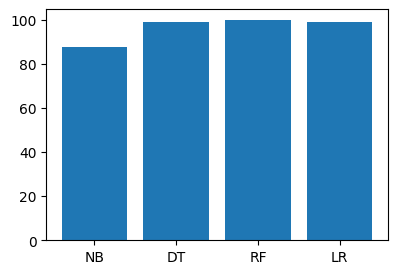

In [97]:
names = ['NB','DT','RF','LR']
values = [87.951,99.058,99.997,99.352]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [98]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 4 artists>

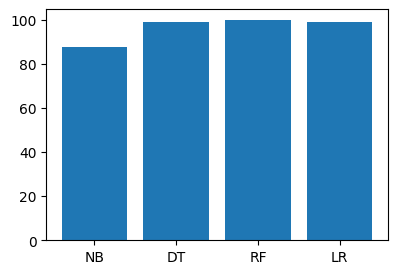

In [99]:
names = ['NB','DT','RF','LR']
values = [87.903,99.052,99.966,99.352]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [100]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')


TRAINING TIME

<BarContainer object of 4 artists>

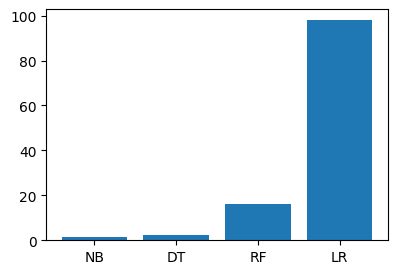

In [101]:
names = ['NB','DT','RF','LR']
values = [1.28314,2.27796,16.35494,97.92668]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [102]:
f.savefig('train_time_figure.png',bbox_inches='tight')


TESTING TIME

<BarContainer object of 4 artists>

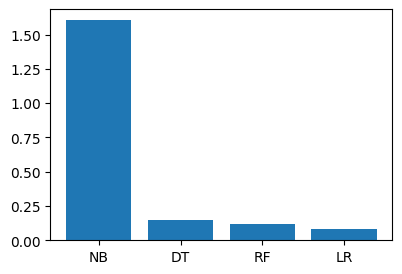

In [103]:
names = ['NB','DT','RF','LR']
values = [1.60423,0.14665,0.12128,0.08549]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [104]:
f.savefig('test_time_figure.png',bbox_inches='tight')

In [105]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
            'dst_bytes', 'count', 'srv_count', 'same_srv_rate']

# Feature and label setup
X = df[features]
y = df['Attack Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "naive_bayes_model.pkl": GaussianNB(),
    "decision_tree_model.pkl": DecisionTreeClassifier(),
    "random_forest_model.pkl": RandomForestClassifier(),
    "logistic_regression_model.pkl": LogisticRegression(max_iter=1000)
}

# Train, evaluate, and save each model
for filename, model in models.items():
    print(f"\nTraining {filename}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    joblib.dump(model, filename)


Training naive_bayes_model.pkl...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         dos       0.85      0.99      0.92     78355
      normal       0.93      0.33      0.49     19353
       probe       0.11      0.03      0.04       850
         r2l       0.15      0.03      0.05       235
         u2r       0.00      0.00      0.00        12

    accuracy                           0.85     98805
   macro avg       0.41      0.28      0.30     98805
weighted avg       0.86      0.85      0.82     98805


Training decision_tree_model.pkl...
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78355
      normal       1.00      1.00      1.00     19353
       probe       0.98      0.97      0.98       850
         r2l       0.98      0.98      0.98       235
         u2r       0.91      0.83      0.87        12

    accuracy                           1.00     98805
   macro avg       0.97      0.96      0.97     98805
weighted avg       1.00      1.00      1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         dos       0.99      0.99      0.99     78355
      normal       0.91      0.99      0.95     19353
       probe       0.42      0.03      0.05       850
         r2l       0.80      0.02      0.03       235
         u2r       0.00      0.00      0.00        12

    accuracy                           0.98     98805
   macro avg       0.62      0.40      0.40     98805
weighted avg       0.97      0.98      0.97     98805



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
!pip install gradio --quiet


In [108]:
import gradio as gr
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate']
X = df[features]
y = df['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


protocol_type_encoder = joblib.load("protocol_type_encoder.pkl")
service_encoder = joblib.load("service_encoder.pkl")
flag_encoder = joblib.load("flag_encoder.pkl")

model_files = {
    "Naive Bayes": "naive_bayes_model.pkl",
    "Decision Tree": "decision_tree_model.pkl",
    "Random Forest": "random_forest_model.pkl",
    "Logistic Regression": "logistic_regression_model.pkl"
}

# Prediction function
def predict_intrusion(model_choice, duration, protocol_type, service, flag, src_bytes, dst_bytes, count, srv_count, same_srv_rate):
    try:
        model = joblib.load(model_files[model_choice])
        proto = protocol_type_encoder.transform([protocol_type])[0]
        serv = service_encoder.transform([service])[0]
        fl = flag_encoder.transform([flag])[0]

        input_data = np.array([[duration, proto, serv, fl, src_bytes, dst_bytes, count, srv_count, same_srv_rate]])
        prediction_encoded = model.predict(input_data)[0]

        return f"Prediction using {model_choice}: {prediction_encoded}"
    except Exception as e:
        return f"Error: {e}"

# Dropdown options from encoders
protocol_options = list(protocol_type_encoder.classes_)
service_options = list(service_encoder.classes_)
flag_options = list(flag_encoder.classes_)

# Gradio UI
gr.Interface(
    fn=predict_intrusion,
    inputs=[
        gr.Dropdown(list(model_files.keys()), label="Select Model"),
        gr.Number(label="Connection Duration"),
        gr.Dropdown(protocol_options, label="Protocol Type"),
        gr.Dropdown(service_options, label="Service"),
        gr.Dropdown(flag_options, label="Flag"),
        gr.Number(label="Source Bytes"),
        gr.Number(label="Destination Bytes"),
        gr.Number(label="Connection Count"),
        gr.Number(label="Service Count"),
        gr.Number(label="Same Service Rate"),
    ],
    outputs="text",
    title="Intrusion Detection System ",
    description="Choose a model and enter network traffic features to detect if it's normal or an attack"
).launch()




It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5d354bb5abe2a22698.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
